<h3>Objective</h3>
<h4>To find best players from each positions with their age, nationality, club based on their Potential Scores</h4>

<h4>Import the libraries needed</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

<h4> Load data and store in dataframe </h4>

In [3]:
#reading data through pandas
df = pd.read_csv('dvi-a2-ps1-data.csv')

<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [4]:
df.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [5]:
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<h4>Fill the missing value for the continous variables with Mean(average) for proper data visualization
<br><br>
    Preprocess height - convert data in  format xx'xx to xx.xx Remove "nan" with Mode and convert the column to numerical
<br><br>    
    Preprocess weight - convert data in  format xxlbs to xx Remove "nan" with Mode and convert the column to numerical
<h4>Do Univariate anlaysis for outliers detection for height and weight
<br><br>

In [6]:
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace = True)
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(), inplace = True)
df['Agility'].fillna(df['Agility'].mean(), inplace = True)
df['Reactions'].fillna(df['Reactions'].mean(), inplace = True)
df['Balance'].fillna(df['Balance'].mean(), inplace = True)
df['ShotPower'].fillna(df['ShotPower'].mean(), inplace = True)
df['Jumping'].fillna(df['Jumping'].mean(), inplace = True)
df['Stamina'].fillna(df['Stamina'].mean(), inplace = True)
df['Strength'].fillna(df['Strength'].mean(), inplace = True)
df['LongShots'].fillna(df['LongShots'].mean(), inplace = True)
df['Aggression'].fillna(df['Aggression'].mean(), inplace = True)
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace = True)
df['Positioning'].fillna(df['Positioning'].mean(), inplace = True)
df['Vision'].fillna(df['Vision'].mean(), inplace = True)
df['Penalties'].fillna(df['Penalties'].mean(), inplace = True)
df['Composure'].fillna(df['Composure'].mean(), inplace = True)
df['Marking'].fillna(df['Marking'].mean(), inplace = True)
df['StandingTackle'].fillna(df['StandingTackle'].mean(), inplace = True)
df['SlidingTackle'].fillna(df['SlidingTackle'].mean(), inplace = True)
df['GKDiving'].fillna(df['GKDiving'].mean(), inplace = True)
df['GKHandling'].fillna(df['GKHandling'].mean(), inplace = True)
df['GKKicking'].fillna(df['GKKicking'].mean(), inplace = True)
df['GKPositioning'].fillna(df['GKPositioning'].mean(), inplace = True)
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace = True)

 #### Preprocess height - convert data in  format xx'xx to xx.xx Remove "nan" with Mode and convert the column to numerical

In [7]:
df['Height'] = df['Height'].str.replace('\'', '.')
df['Height']=df['Height'].astype(float)

In [8]:
if df['Height'].isnull().any():
    df['Height']=df['Height'].fillna(df['Height'].mode()[0])
    df['Height']=df['Height'].astype(float)

In [9]:
print('Height has unique values as {}'.format(df['Height'].unique()))

Height has unique values as [5.7  6.2  5.9  6.4  5.11 5.8  6.   5.6  5.1  6.6  6.1  5.4  6.3  5.5
 6.5  6.7  5.3  5.2  6.8  6.9 ]


#### Preprocess weight - convert data in format xxlbs to xx Remove "nan" with Mode and convert the column to numerical 

In [10]:
df['Weight'] = df['Weight'].str.replace('lbs', '')
df['Weight'] = df['Weight'].astype(float)

In [11]:
if df['Weight'].isnull().any():
    df['Weight']=df['Weight'].fillna(df['Weight'].mode()[0])
df['Weight']=df['Weight'].astype(int)

In [12]:
print('Weight has unique values as {}'.format(df['Weight'].unique()))

Weight has unique values as [159 183 150 168 154 163 146 190 181 192 176 172 148 165 196 161 187 212
 170 203 157 185 130 174 207 134 141 152 179 132 201 198 209 214 143 205
 137 194 216 139 220 126 218 123 227 128 223 225 121 115 117 236 229 243
 110 119 234]


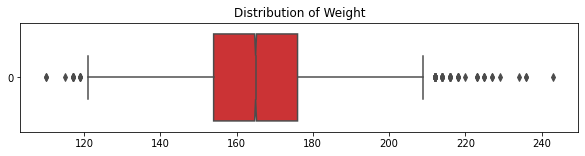

In [13]:
#Checking for outliers for Weight
plot.figure(figsize=(10,2))
ax1 = sns.boxplot(data = df['Weight'], notch=True, orient = "h", palette = "Set1")
plot.title('Distribution of Weight')
plot.show()


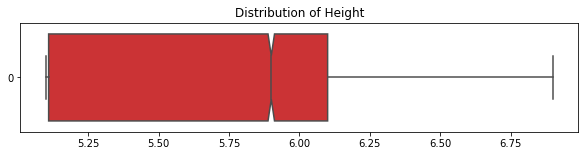

In [14]:
#Checking for outliers for Height
plot.figure(figsize=(10,2))
ax2 = sns.boxplot(data = df['Height'], orient = "h", notch=True, palette = "Set1",dodge=True)
plot.title('Distribution of Height')
plot.show()

#### Summarise your findings from the visual  

Weight feature has a lot of outliers in comparison to Height which does not have outliers as per the plotting seen above.
The IQR for Weight ranges from 155 to 175 approximately, median is at 170. The min and max range are around 120 and 210.
The IQR for Height ranges from 5.1 to 6.1 approximately, median is at 5.8. The min and max range are around 5.0 and 6.1.

#### The reason for selecting the chart type you did  

The box plot charts helps visualize the distribution and gives a good sense of outliers and hence the selection.

#### Mention the pre-attentive attributes used.

The pre-attentive attributes used here are Color and Form (width)

#### Mention the gestalt principles used. 

Proximity and Continuity


<h4>Do Bi-Variate anlaysis for outliers detection for height and weight 
<br><br>

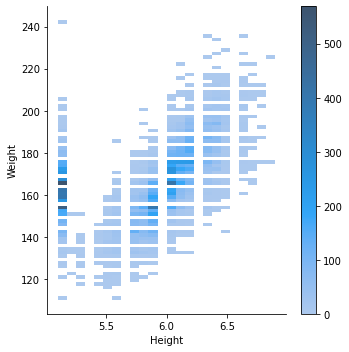

In [15]:
#Bivariate distribution
sns.displot(df,x='Height',y='Weight',cbar=True)

#### Summarise your findings from the visual  

There are a few outliers seen at the extermities of the chart. for example player with height as 5'1 and weight of 243 lbs, similarly on the extreme right with height as 6'6 and weight of 236 lbs.

#### The reason for selecting the chart type you did  

The displot provides with a heatmap view that enables bivariate analysis between two variables.

#### Mention the pre-attentive attributes used.

The pre-attentive attributes used here are Position, color-saturation.

#### Mention the gestalt principles used.  

Similarity, Proximity and Continuity  

<br>
<br>
<hr style="height:10px;border-width:0;color:gray;background-color:gray">

<h4>What kind of co-relation exists between Age and Overall

<AxesSubplot:title={'center':'Heatmap of dataset'}>

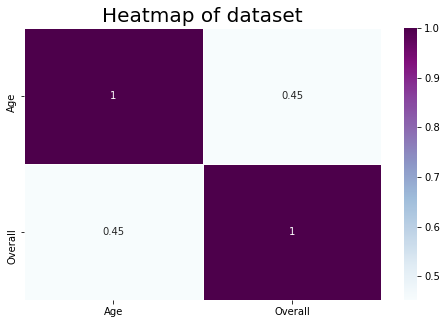

In [16]:
# Correlation heatmap
plot.rcParams['figure.figsize']=(8,5)
hmap=sns.heatmap(df[['Age', 'Overall']].corr(), annot = True, linewidths=.5, cmap='BuPu')
hmap.set_title(label='Heatmap of dataset', fontsize=20)
hmap

#### Summarise your findings from the visual  

Based on the correlation numbers showcased in the above chart, Age and Overall are positively correlated and have a week co-relation. These can be considered as two independent features that can be used to fit the model for any further analysis.

#### The reason for selecting the chart type you did  

The correlation heatmap provides insights around the relationship between a set of variables. 

#### Mention the pre-attentive attributes used. 

The pre-attentive attributes used here are Position, color-saturation.

#### Mention the gestalt principles used.

Similarity, Proximity and Continuity  

<br>
<br>
<hr style="height:10px;border-width:0;color:gray;background-color:gray">

<h4>What kind of relation exists between Age and (potential vs Overall). Create an appropriate visual to compare potential vs Overall with respect to age in one single visual.
<br><br>

<Figure size 1440x720 with 0 Axes>

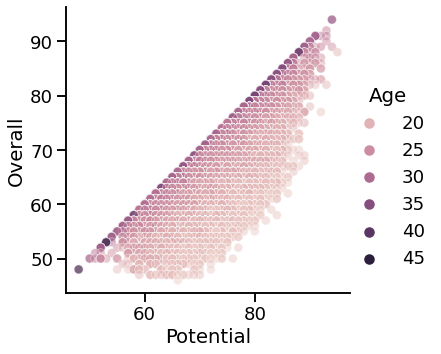

In [17]:
sns.set_context("talk", font_scale=1.1)
plot.figure(figsize=(20,10))
sns.relplot(x="Potential", 
                y="Overall",
                hue="Age",
                sizes=(20,500),
                alpha=0.5,
                data=df)

#### Summarise your findings from the visual  

Based on the above chart, its evident that age - there exists a linear relationship between age vs potential vs overall.

#### The reason for selecting the chart type you did  

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

#### Mention the pre-attentive attributes used.

The pre-attentive attributes used here are Position, color-hue.

#### Mention the gestalt principles used.

Enclosure, Similairty, Proximity

<br>
<br>
<hr style="height:10px;border-width:0;color:gray;background-color:gray">

<h4>What kind of relation exists between Player Vision and Player Value. Create an appropriate visual to show any kind of relation that exists between Vision and Value of the player in one single visual.
<br><br>

In [18]:
#converting the Value feature into a float to help with visualization.
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

df['Value'] = df['Value'].apply(lambda x: extract_value_from(x))

<Figure size 720x7200 with 0 Axes>

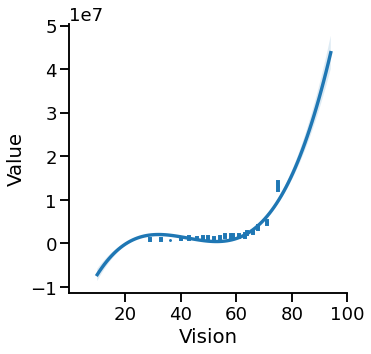

In [19]:
plot.figure(figsize=(10,100))
x = [20, 40, 60, 80, 100 ]
g = sns.lmplot(x="Vision",y="Value",data=df,order=3, scatter_kws={"s": 2}, x_bins=20)
g.set(xlim = (0,100))
g.set(xticks=x)

#### Summarise your findings from the visual  

There exists a Polynomial relationship between Player Vision and Player Value with order of 3 (cubic) that fit the data here. Linear for Order = 1 and Parabloic for Order = 2 where not a good fit for this dataset.

#### The reason for selecting the chart type you did  

LMPlot helps us with a 2D scatterplot with an overlaid regression line.
The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

#### Mention the pre-attentive attributes used.

The pre-attentive attributes used here are Position, Slope.

#### Mention the gestalt principles used. 

Similairty, Proximity

<br>
<br>
<hr style="height:10px;border-width:0;color:gray;background-color:gray">

#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.<br>
   4.Mention the gestalt principles used.<br>

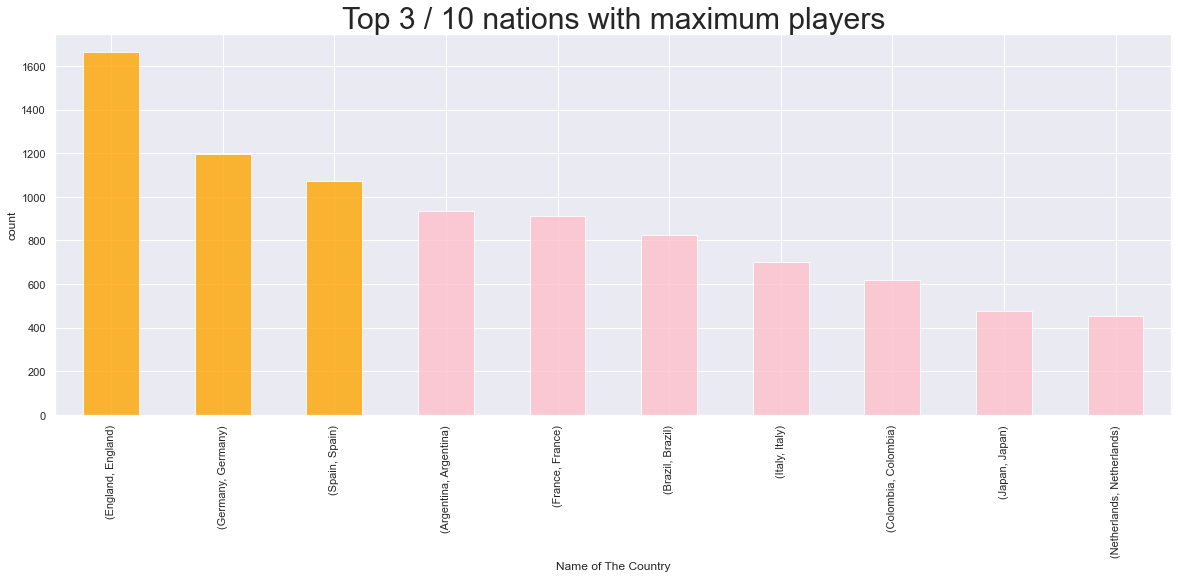

In [20]:
sns.set()
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
df.groupby(['Nationality']).Nationality.value_counts().nlargest(10).plot.bar( color=['Orange', 'Orange','Orange', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink'], alpha=0.8 ,figsize = (20, 7))
plot.title('Top 3 / 10 nations with maximum players', fontsize = 30, fontweight = 20)
plot.xlabel('Name of The Country')
plot.ylabel('count')
plot.show()

#### Summarise your findings from the visual  

England, Germany and Spain have the maximum players available as part of this dataset. They are followed by Argentina, France, Brazil, Italy, Columbia, Japan and Netherlands

#### The reason for selecting the chart type you did  

A bar chart uses bars to show comparisons between categories of data. These bars can be displayed horizontally or vertically. A bar graph will always have two axis. One axis will generally have numerical values, and the other will describe the types of categories being compared. The color here could help denote the Top 3 and remaining countries in the dataset.

#### Mention the pre-attentive attributes used.  

The pre-attentive attributes used here are Length/height, color-hue.

#### Mention the gestalt principles used.

Similairty, Proximity

<br>
<br>
<hr style="height:10px;border-width:0;color:gray;background-color:gray">